In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context('notebook', font_scale=1.2)
sns.set_style('whitegrid')

# Data preparation

In [97]:
csl_data = pd.read_csv("data\\csl_data.csv")
csl_data['date'] = pd.to_datetime(csl_data[['year', 'month', 'day', 'hour', 'minute']])
csl_data = csl_data.set_index('date')
csl_data = csl_data[['PM10_0', 'PM2_5', 'year', 'month', 'day', 'hour', 'minute']]
csl_data['month'] = csl_data['month'].replace({6:'June', 7:'July', 8:'August', 9:'September'})
csl_data.head()

,PM10_0,PM2_5,year,month,day,hour,minute
date,,,,,,,
2020-06-23 12:44:00,5,5,2020,June,23,12,44
2020-06-23 12:59:00,5,3,2020,June,23,12,59
2020-06-23 13:15:00,3,3,2020,June,23,13,15
2020-06-23 13:30:00,6,4,2020,June,23,13,30
2020-06-23 13:45:00,1,1,2020,June,23,13,45


# Daily averages

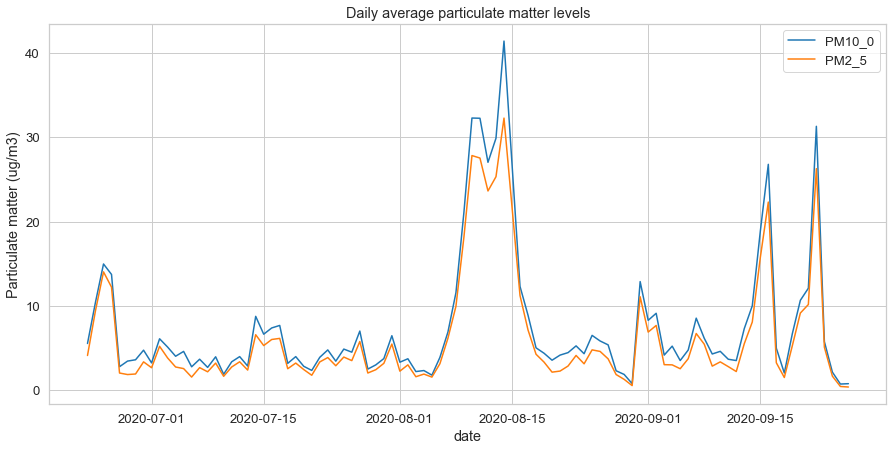

In [98]:
daily_averages = csl_data[['PM10_0', 'PM2_5']].resample('D').mean()

plt.figure(figsize=(15, 7))
plt.title("Daily average particulate matter levels")

sns.lineplot(data=daily_averages, dashes=False)
plt.ylabel("Particulate matter (ug/m3)");

# Monthly averages

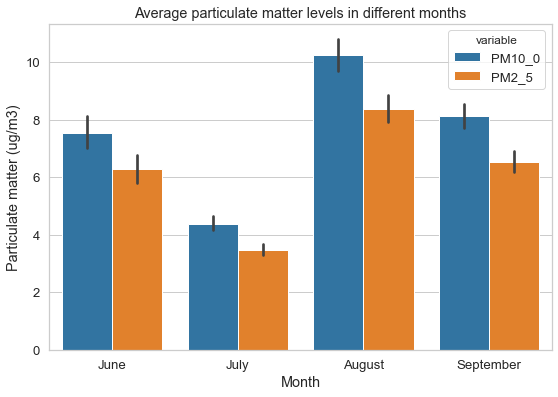

In [99]:
plt.figure(figsize=(9, 6))
monthly_averages = csl_data.reset_index().melt(id_vars='month', value_vars=['PM10_0', 'PM2_5'])
sns.barplot(data=monthly_averages, x='month', y='value', hue='variable')
plt.xlabel('Month')
plt.ylabel('Particulate matter (ug/m3)')
plt.title('Average particulate matter levels in different months');

# Averages on different days of the week

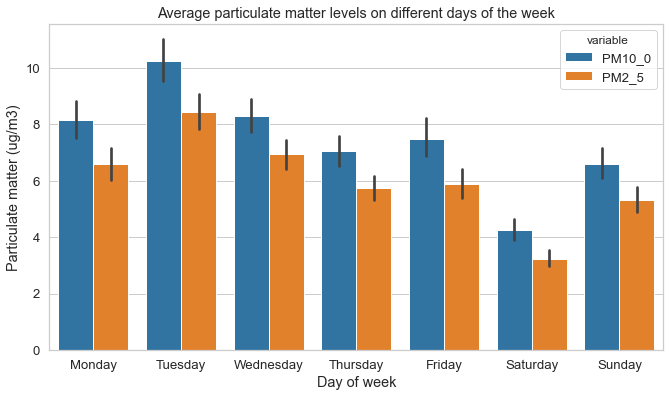

In [100]:
weekday_averages = csl_data
weekday_averages['dayofweek'] = weekday_averages.index.dayofweek
weekday_averages = weekday_averages.reset_index().melt(id_vars='dayofweek', value_vars=['PM10_0', 'PM2_5'])

plt.figure(figsize=(11,6))
ax = sns.barplot(data=weekday_averages, y='value', x='dayofweek', hue='variable')
ax.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of week')
plt.ylabel('Particulate matter (ug/m3)')
plt.title('Average particulate matter levels on different days of the week');

# Average at different hours of the day

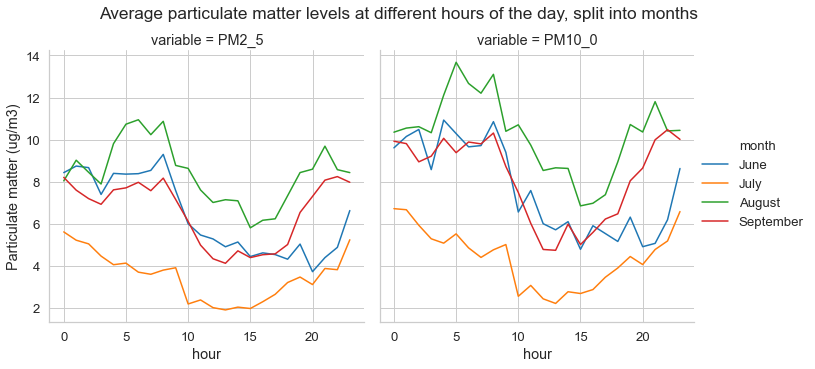

In [122]:
hours_data = csl_data.melt(id_vars=['hour', 'month'], value_vars=['PM2_5','PM10_0'], value_name='Particulate matter (ug/m3)')
sns.relplot(data=hours_data, x='hour', y='Particulate matter (ug/m3)', hue='month', col='variable', kind='line', ci=None)
plt.suptitle('Average particulate matter levels at different hours of the day, split into months', y=1.03)
plt.ylabel('Particulate matter (ug/m3)');